In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
ethereum = pd.read_csv("ethereum.csv")
ethereum.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-09-13,1.041780,1.042700,0.902832,0.936003,0.936003,644138.0
1,2015-09-14,0.940566,0.949387,0.871760,0.875622,0.875622,741085.0
2,2015-09-15,0.875189,1.045540,0.875189,0.944410,0.944410,703390.0
3,2015-09-16,0.941977,0.952698,0.901639,0.907175,0.907175,615593.0
4,2015-09-17,0.906865,0.909204,0.831132,0.874231,0.874231,897940.0


In [3]:
ethereum.shape

(2193, 7)

In [4]:
ethereum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2189 non-null   float64
 2   High       2189 non-null   float64
 3   Low        2189 non-null   float64
 4   Close      2189 non-null   float64
 5   Adj Close  2189 non-null   float64
 6   Volume     2189 non-null   float64
dtypes: float64(6), object(1)
memory usage: 120.1+ KB


In [5]:
total = ethereum.isnull().sum().sort_values(ascending=False)
percent = (ethereum.isnull().sum()/ethereum.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Open,4,0.001824
High,4,0.001824
Low,4,0.001824
Close,4,0.001824
Adj Close,4,0.001824
Volume,4,0.001824
Date,0,0.000000


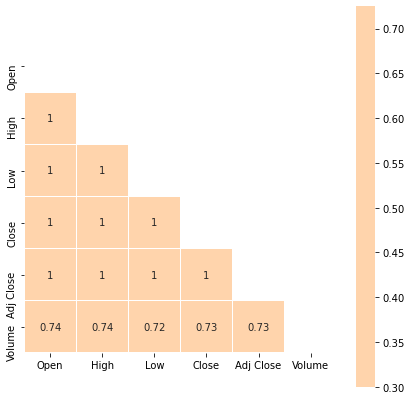

In [6]:
#Plotting correlation
plt.figure(figsize=(7,7))
corr=ethereum[ethereum.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(ethereum[ethereum.columns[1:]].corr(), mask=mask, vmax=.3, center=0,
square=True, linewidths=.5,annot=True)
plt.show()

<AxesSubplot:xlabel='Volume'>

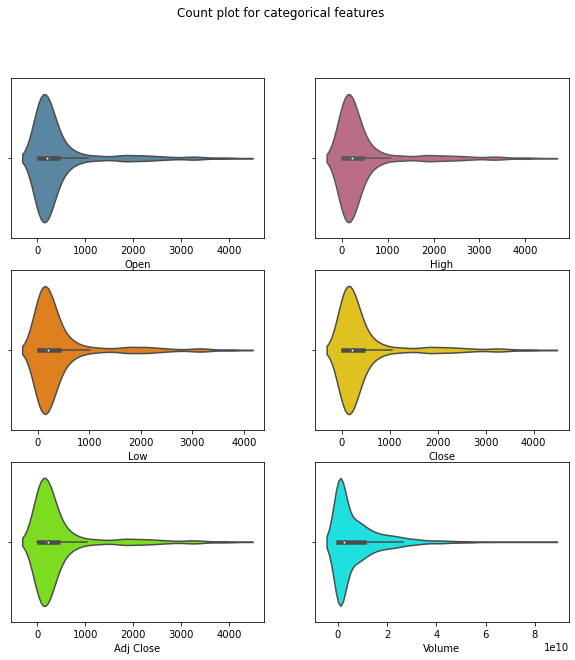

In [7]:
fig,axes = plt.subplots(3,2,figsize = (10,10))
fig.suptitle("Count plot for categorical features")
#Open
sns.violinplot(ax=axes[0,0],data=ethereum,x='Open',color='#4e89ae')
#High
sns.violinplot(ax=axes[0,1],data=ethereum,x='High',color='#c56183')
#Low
sns.violinplot(ax=axes[1,0],data=ethereum,x='Low',color='#ff8000')
#Close
sns.violinplot(ax=axes[1,1],data=ethereum,x='Close',color='#ffd700')
#Adj Close
sns.violinplot(ax=axes[2,0],data=ethereum,x='Adj Close',color='#7cfC00')
#Volume
sns.violinplot(ax=axes[2,1],data=ethereum,x='Volume',color='#00FFFF')

In [8]:
ethereum['Volume'].fillna(value=0, inplace=True)
ethereum['Open'].fillna(method='ffill', inplace=True)
ethereum['High'].fillna(method='ffill', inplace=True)
ethereum['Low'].fillna(method='ffill', inplace=True)
ethereum['Close'].fillna(method='ffill', inplace=True)
ethereum['Adj Close'].fillna(method='ffill', inplace=True)

In [9]:
ethereum['Date'] = pd.to_datetime(ethereum['Date'])
ethereum.rename(columns = {'Close':'Price'}, inplace = True)

In [10]:
ethereum['Date'] = ethereum['Date'].dt.tz_localize(None)
ethereum = ethereum.set_index('Date')
ethereum = ethereum[['Price']]

In [11]:
#Splitting data
split_date = '2020-02-25'
data_train = ethereum.loc[ethereum.index <= split_date].copy()
data_test = ethereum.loc[ethereum.index > split_date].copy()


In [12]:
#Data preprocessing
training_set = data_train.values
training_set = np.reshape(training_set, (len(training_set), 1))
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

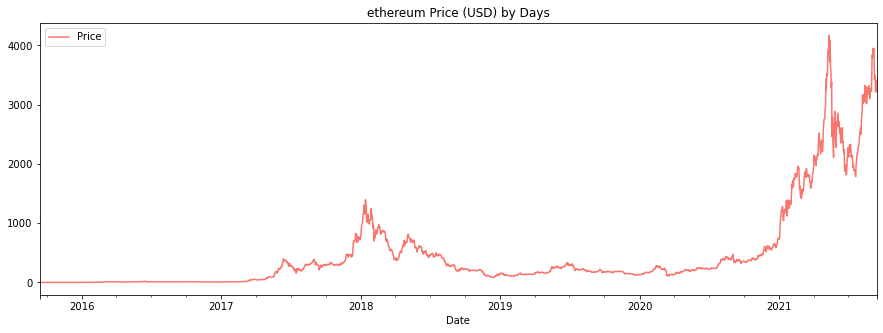

In [13]:
#Historical price
_ = ethereum.plot(style='', figsize=(15,5), color="#F8766D", title='ethereum Price (USD) by Days')

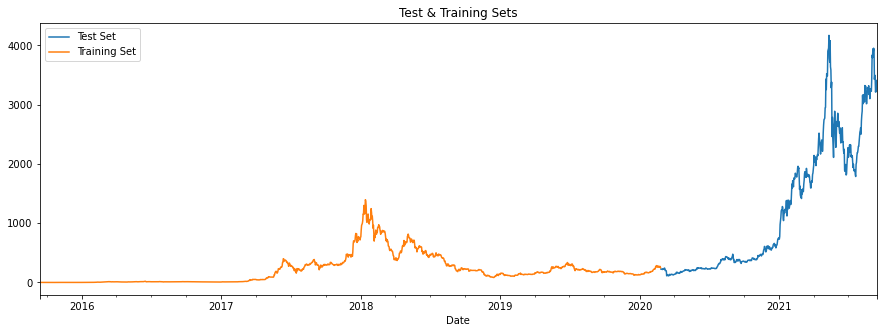

In [14]:
#Plotting the test and training sets
_ = data_test.rename(columns={'Price': 'Test Set'}).join(data_train.rename(columns={'Price': 'Training Set'}), how='outer').plot(figsize=(15,5), title='Test & Training Sets', style='')

In [15]:
#Creating the model
model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
33/33 - 1s - loss: 0.3138
Epoch 2/100
33/33 - 0s - loss: 0.0636
Epoch 3/100
33/33 - 0s - loss: 0.0576
Epoch 4/100
33/33 - 0s - loss: 0.0576
Epoch 5/100
33/33 - 0s - loss: 0.0551
Epoch 6/100
33/33 - 0s - loss: 0.0545
Epoch 7/100
33/33 - 0s - loss: 0.0499
Epoch 8/100
33/33 - 0s - loss: 0.0494
Epoch 9/100
33/33 - 0s - loss: 0.0454
Epoch 10/100
33/33 - 0s - loss: 0.0446
Epoch 11/100
33/33 - 0s - loss: 0.0435
Epoch 12/100
33/33 - 0s - loss: 0.0405
Epoch 13/100
33/33 - 0s - loss: 0.0404
Epoch 14/100
33/33 - 0s - loss: 0.0409
Epoch 15/100
33/33 - 0s - loss: 0.0366
Epoch 16/100
33/33 - 0s - loss: 0.0364
Epoch 17/100
33/33 - 0s - loss: 0.0331
Epoch 18/100
33/33 - 0s - loss: 0.0316
Epoch 19/100
33/33 - 0s - loss: 0.0298
Epoch 20/100
33/33 - 0s - loss: 0.0290
Epoch 21/100
33/33 - 0s - loss: 0.0279
Epoch 22/100
33/33 - 0s - loss: 0.0267
Epoch 23/100
33/33 - 0s - loss: 0.0268
Epoch 24/100
33/33 - 0s - loss: 0.0256
Epoch 25/100
33/33 - 0s - loss: 0.0240
Epoch 26/100
33/33 - 0s - loss: 0.

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_ETH_price = model.predict(inputs)
predicted_ETH_price = sc.inverse_transform(predicted_ETH_price)

In [18]:
data_test['Price_Prediction'] = predicted_ETH_price
data_all = pd.concat([data_test, data_train], sort=False)

In [19]:
data_all

,Price,Price_Prediction
Date,,
2020-02-26,225.680267,250.748459
2020-02-27,226.753387,251.702347
2020-02-28,226.760498,251.708710
2020-02-29,219.848511,245.566437
2020-03-01,218.970596,244.786591
...,...,...
2020-02-21,265.600616,NaN
2020-02-22,262.331726,NaN
2020-02-23,273.754150,NaN


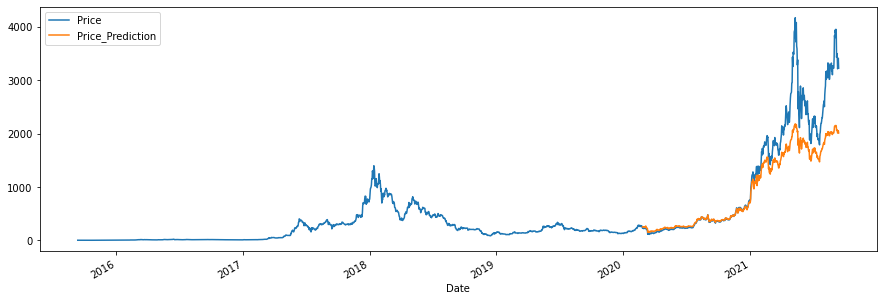

In [20]:
_ = data_all[['Price','Price_Prediction']].plot(figsize=(15, 5))

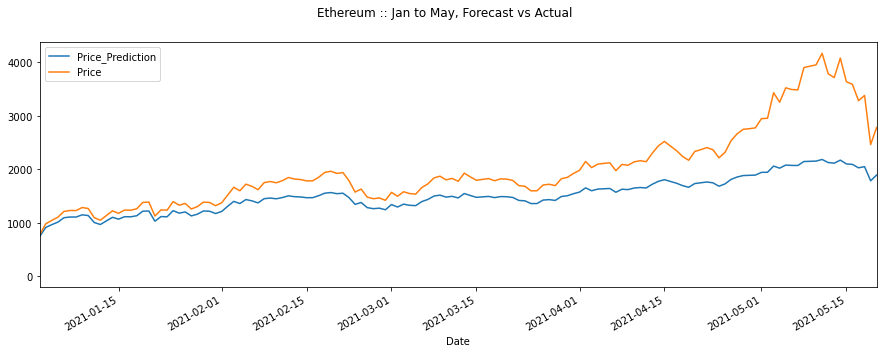

In [24]:
#Plotting the forecast v/s actual price
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = data_all[['Price_Prediction','Price']].plot(ax=ax)
ax.set_xbound(lower='01-02-2021', upper='20-05-2021')
plot = plt.suptitle('Ethereum :: Jan to May, Forecast vs Actual')

In [22]:
#MSE
mean_squared_error(y_true=data_test['Price'],y_pred=data_test['Price_Prediction'])

276263.1910578681

In [23]:
#MAE
mean_absolute_error(y_true=data_test['Price'],y_pred=data_test['Price_Prediction'])

298.60983932756767